In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from data_loaders import generate_shift_one_dim_dataset

In [2]:
p_tests = [0.1, 0.2, 0.5, 0.7, 0.9]
data = []
for i in range(len(p_tests)):
    X_train, y_train= generate_shift_one_dim_dataset(n=500, p=p_tests[i], seed=0)
    data.append((X_train, y_train))

In [3]:
p_tests

[0.1, 0.2, 0.5, 0.7, 0.9]

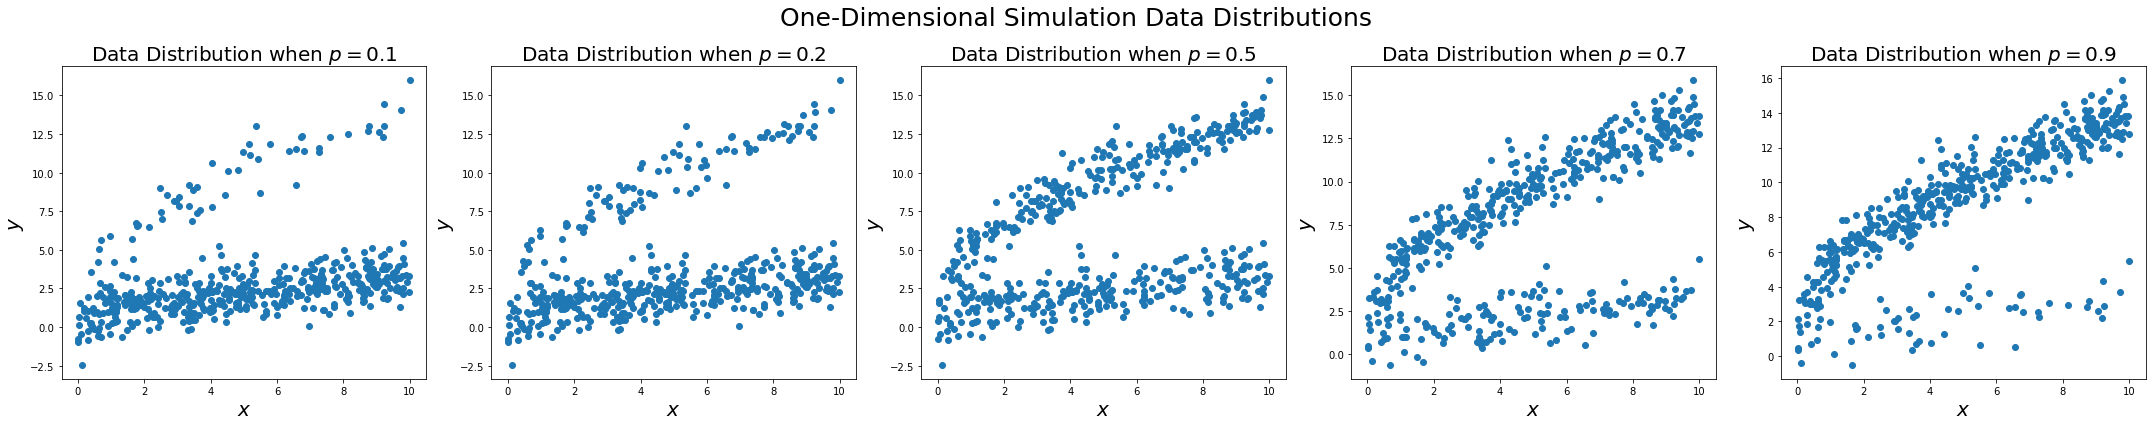

In [4]:
fig, ax = plt.subplots(1, 5, figsize=(30, 6))
for i in range(len(data)):
    ax[i].scatter(data[i][0], data[i][1])
    ax[i].set_title("Data Distribution when " + r"$p={}$".format(round(p_tests[i], 3)), fontsize=20)
    ax[i].set_xlabel(r"$x$", fontsize=20)
    ax[i].set_ylabel(r"$y$", fontsize=20)
plt.suptitle("One-Dimensional Simulation Data Distributions", fontsize=25)
plt.tight_layout()
plt.savefig("figs/p_test_distributions.pdf")

In [5]:
df = pd.read_csv("results/sim_one_dim.csv")
df.groupby(["dataset", "method", "gamma", "p_train", "p_test"]).agg(["mean", "std"])["test_mse"]

mean       std
dataset         method        gamma p_train p_test                     
shifted_one_dim erm           1.0   0.1     0.1      6.306081  0.186500
                                    0.2     0.1      6.939364  0.173742
                                            0.2     10.480064  0.126318
                                            0.5     20.866315  0.304569
                                            0.7     27.880301  0.484486
                                            0.9     34.913120  0.667783
                                    0.5     0.5     15.743405  0.151966
                                    0.7     0.7     13.340799  0.122969
                                    0.9     0.9      6.274307  0.176241
                ru_regression 2.0   0.2     0.1     10.074469  0.246615
                                            0.2     11.845897  0.137790
                                            0.5     17.029408  0.236358
                                            0.7     20.522421  0.307677
                                            0.9     24.045609  0.540065
                              4.0   0.2     0.1     12.456421  0.431221
                                            0.2     13.387597  0.309218
                                            0.5     16.092943  0.179340
                                            0.7     17.898158  0.299917
                                            0.9     19.750389  0.583747
                              8.0   0.2     0.1     13.418914  0.306119
                                            0.2     14.057424  0.254674
                                            0.5     15.895153  0.132629
                                            0.7     17.119421  0.142767
                                            0.9     18.387612  0.304329
                              16.0  0.2     0.1     13.613045  0.399817
                                            0.2     14.196819  0.307820
                                            0.5     15.872770  0.140380
                                            0.7     16.982796  0.262228
                                            0.9     18.142197  0.480101

In [8]:
print(df.groupby(["dataset", "method", "gamma", "p_train", "p_test"]).agg(["mean", "std"])["test_mse"].round(3).to_latex())

\begin{tabular}{lllllrr}
\toprule
                &               &      &     &     &    mean &    std \\
dataset & method & gamma & p\_train & p\_test &         &        \\
\midrule
shifted\_one\_dim & erm & 1.0  & 0.1 & 0.1 &   6.306 &  0.187 \\
                &               &      & 0.2 & 0.1 &   6.939 &  0.174 \\
                &               &      &     & 0.2 &  10.480 &  0.126 \\
                &               &      &     & 0.5 &  20.866 &  0.305 \\
                &               &      &     & 0.7 &  27.880 &  0.484 \\
                &               &      &     & 0.9 &  34.913 &  0.668 \\
                &               &      & 0.5 & 0.5 &  15.743 &  0.152 \\
                &               &      & 0.7 & 0.7 &  13.341 &  0.123 \\
                &               &      & 0.9 & 0.9 &   6.274 &  0.176 \\
                & ru\_regression & 2.0  & 0.2 & 0.1 &  10.074 &  0.247 \\
                &               &      &     & 0.2 &  11.846 &  0.138 \\
                &   